# Лабораторная работа №2

## Выполнил: Юнусов Р. К М8О-310Б-22

In [1]:
%pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np

class LinearClassifier:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # столбец единиц для смещения
        X = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        linear_output = X @ self.weights
        return (linear_output >= 0).astype(int)

In [79]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            predictions = self.sigmoid(X @ self.weights)
            error = predictions - y
            gradient = X.T @ error / len(y)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        predictions = self.sigmoid(X @ self.weights)
        return (predictions >= 0.5).astype(int)

In [66]:
%pip install pandas
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.drop('RiskScore', axis=1)
test_data = test_data.drop('ID', axis=1)

print(train_data.head(1))
print(test_data.head(1))

  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   

   ...  JobTenure  EmploymentStatus  EducationLevel  Experience  NetWorth  \
0  ...        4.0          Employed       Associate         4.0   35067.0   

  BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.25779      0.251465           508.97023                0.288013   

   LoanApproved  
0           0.0  

[1 rows x 35 columns]
  ApplicationDate  Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      1979-01-03   49        207095          850       14458            60   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0        Single                   0                Rent         

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

categorical_columns_train_data = train_data.select_dtypes(include=['object', 'category']).columns
# почистим null cтроки
train_data = train_data.dropna()
for feature in categorical_columns_train_data:
    le = LabelEncoder()
    train_data[feature] = le.fit_transform(train_data[feature])

categorical_columns_test_data = test_data.select_dtypes(include=['object', 'category']).columns
test_data = test_data.dropna()
for feature in categorical_columns_test_data:
    le = LabelEncoder()
    test_data[feature] = le.fit_transform(test_data[feature])

In [83]:
# разделяем на признаки и целевую переменную
X_train = train_data.drop(columns=['LoanApproved'])
y_train = train_data['LoanApproved']

X_test = test_data.drop(columns=['LoanApproved'])
y_test = test_data['LoanApproved']

# нормализуем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Model: Logistic Regression (custom)
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2419
           1       0.93      0.91      0.92      2581

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

Accuracy: 0.9206



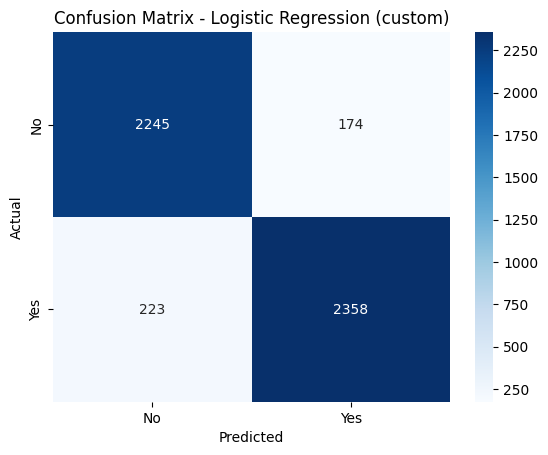

Model: Linear Classifier (custom)
              precision    recall  f1-score   support

           0       1.00      0.15      0.26      2419
           1       0.56      1.00      0.71      2581

    accuracy                           0.59      5000
   macro avg       0.78      0.57      0.49      5000
weighted avg       0.77      0.59      0.49      5000

Accuracy: 0.5874



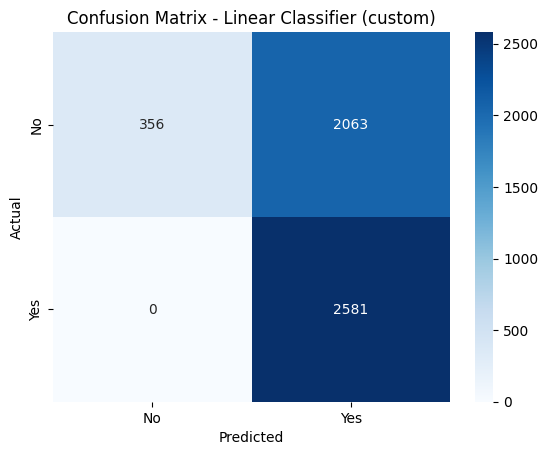

Model: Logistic Regression (sklearn)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2419
           1       0.94      0.94      0.94      2581

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

Accuracy: 0.9348



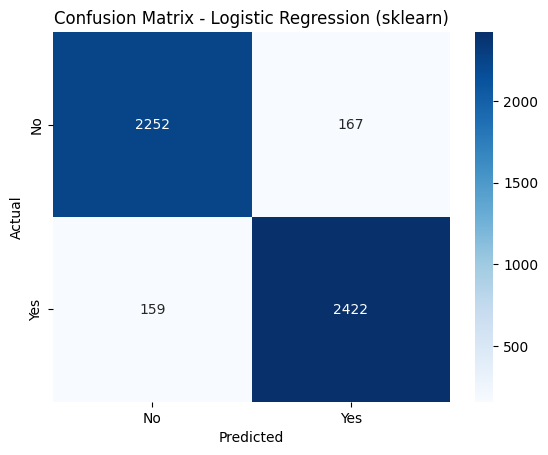

Model: SVM
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2419
           1       0.93      0.93      0.93      2581

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

Accuracy: 0.9294



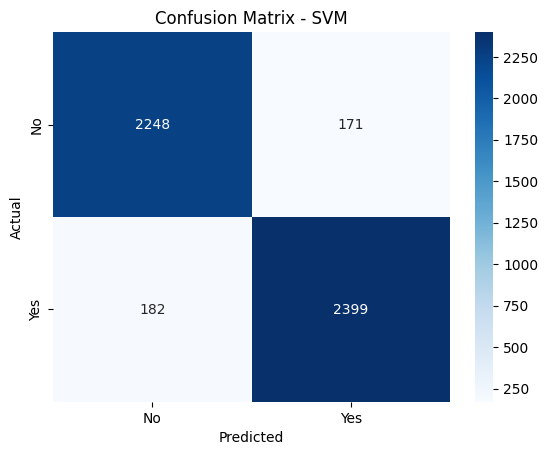

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2419
           1       0.89      0.89      0.89      2581

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Accuracy: 0.8882



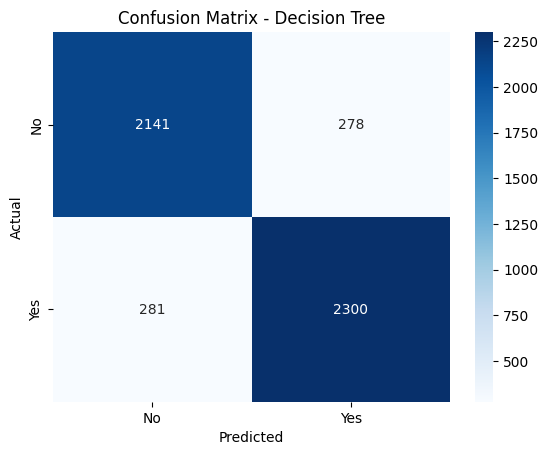

Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2419
           1       0.92      0.93      0.93      2581

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

Accuracy: 0.9234



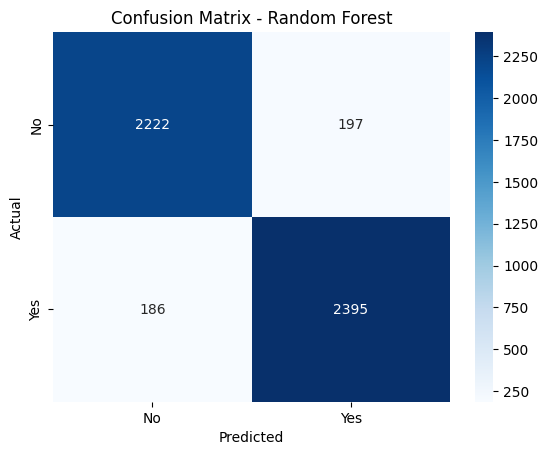

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2419
           1       0.93      0.93      0.93      2581

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

Accuracy: 0.9284



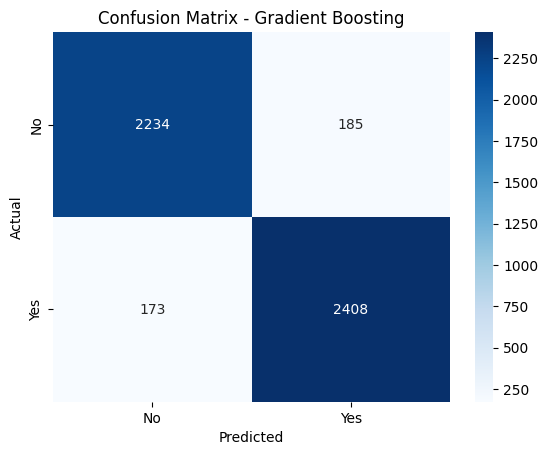

In [84]:
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression (custom)": LogisticRegression(),
    "Linear Classifier (custom)": LinearClassifier(),
    "Logistic Regression (sklearn)": SklearnLogReg(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(f"Model: {name}")
        if name in ["Logistic Regression (custom)", "Linear Classifier (custom)"]:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        print(classification_report(y_test, y_pred))
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}\n")
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Выводы
1. Логистическая регрессия (custom) показала наивысшую точность (92%) среди всех моделей, что означает, что она хорошо справляется с предсказаниями в целом.

2. Линейный классификатор (custom) показал наименьшую точность (59%), затем идет решающее дерево.

4. Модели из sklearn (логистическая регрессия, SVM и случайный лес) дали похожие результаты с точностью около 93%. Это говорит о том, что эти алгоритмы показывают стабильные результаты для данной задачи.

5. Решающее дерево и случайный лес показали почти одинаковые результаты, но случайный лес немного лучше по recall для класса 1.

6. Градиентный бустинг также показал хорошие результаты с точностью около 93%, что сравнимо с другими моделями.

Все методы в целом показывают хороший баланс между precision и recall, за исключением линейного классификатора, где наблюдается заметный дисбаланс.

Мне кажется, в этой задаче recall оказался самой важной метрикой, особенно для моделей с дисбалансом классов (например, линейный классификатор), так как она показывает, насколько хорошо модель находит все правильные положительные пример. Это важно в задачах, где нужно минимизировать пропущенные положительные случаи.

Таким образом, для этой задачи наиболее важным является recall, потому что он показывает, как хорошо модель классифицирует положительные примеры, что критично в задачах, связанных с кредитными рисками или дефолтами.